# One-word-in and one-word-out Sequence

In [108]:
import numpy as np
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


### text

In [187]:
text = """ My name is Hasan\n
I am a CSE engineer\n 
I completed my B.Sc in CSE from Leading University\n
Now I am working at Messrs Ma Moni Traders as a Data Analyst\n """

### Tokenize

In [188]:
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

encoded = tokenizer.texts_to_sequences([text])[0]

In [189]:
print('Length of encoded is :',len(encoded))
print('\n\n',encoded)

Length of encoded is : 32


 [2, 6, 7, 8, 1, 3, 4, 5, 9, 1, 10, 2, 11, 12, 13, 5, 14, 15, 16, 17, 1, 3, 18, 19, 20, 21, 22, 23, 24, 4, 25, 26]


### Vocabulary size

In [190]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 27


### Word to Word sequence

In [191]:
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
print( 'Total Sequences: %d' % len(sequences))

Total Sequences: 31


In [192]:
sequences

[[2, 6],
 [6, 7],
 [7, 8],
 [8, 1],
 [1, 3],
 [3, 4],
 [4, 5],
 [5, 9],
 [9, 1],
 [1, 10],
 [10, 2],
 [2, 11],
 [11, 12],
 [12, 13],
 [13, 5],
 [5, 14],
 [14, 15],
 [15, 16],
 [16, 17],
 [17, 1],
 [1, 3],
 [3, 18],
 [18, 19],
 [19, 20],
 [20, 21],
 [21, 22],
 [22, 23],
 [23, 24],
 [24, 4],
 [4, 25],
 [25, 26]]

### pad input sequences

In [193]:
# pad input sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Max Sequence Length: 2


### Spliting data

In [194]:
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]

### one-hot-encoding

In [195]:
y = to_categorical(y, num_classes=vocab_size)

### Model

In [196]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))



In [197]:
# summarize defined model
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 1, 10)             270       
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dense_11 (Dense)             (None, 27)                1377      
Total params: 13,847
Trainable params: 13,847
Non-trainable params: 0
_________________________________________________________________


In [198]:
# compile network
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])


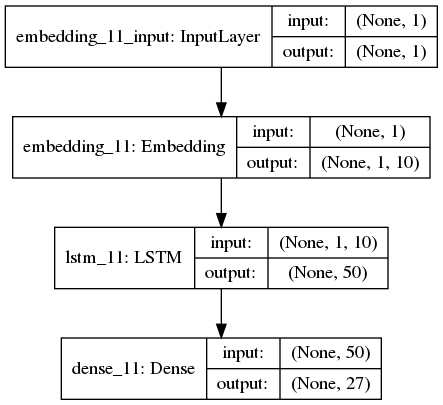

In [199]:
#plot model
plot_model(model, to_file='model.png', show_shapes=True)


In [200]:
# fit network
model.fit(X, y, epochs=500, verbose=2)

/home/hasan/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
 - 0s - loss: 3.2961 - accuracy: 0.0000e+00
Epoch 2/500
 - 0s - loss: 3.2953 - accuracy: 0.0645
Epoch 3/500
 - 0s - loss: 3.2946 - accuracy: 0.0968
Epoch 4/500
 - 0s - loss: 3.2938 - accuracy: 0.0968
Epoch 5/500
 - 0s - loss: 3.2930 - accuracy: 0.0645
Epoch 6/500
 - 0s - loss: 3.2922 - accuracy: 0.0645
Epoch 7/500
 - 0s - loss: 3.2915 - accuracy: 0.0968
Epoch 8/500
 - 0s - loss: 3.2907 - accuracy: 0.0968
Epoch 9/500
 - 0s - loss: 3.2899 - accuracy: 0.1290
Epoch 10/500
 - 0s - loss: 3.2891 - accuracy: 0.1290
Epoch 11/500
 - 0s - loss: 3.2883 - accuracy: 0.1290
Epoch 12/500
 - 0s - loss: 3.2875 - accuracy: 0.1290
Epoch 13/500
 - 0s - loss: 3.2867 - accuracy: 0.1290
Epoch 14/500
 - 0s - loss: 3.2858 - accuracy: 0.1290
Epoch 15/500
 - 0s - loss: 3.2850 - accuracy: 0.1290
Epoch 16/500
 - 0s - loss: 3.2841 - accuracy: 0.0968
Epoch 17/500
 - 0s - loss: 3.2832 - accuracy: 0.0968
Epoch 18/500
 - 0s - loss: 3.2823 - accuracy: 0.0968
Epoch 19/500
 - 0s - loss: 3.2814 - accuracy: 0.096

### Generate sequence

In [201]:
# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = array(encoded)
        # predict a word in the vocabulary
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

In [203]:
# evaluate
print(generate_seq(model, tokenizer, 'Hasan', 6))

Hasan i am a cse from leading
